In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/df_train.csv')
nf = np.load('../data/noise.npy')

df['s1_diff'] = df['s1'].diff(1)
df['s2_diff'] = df['s2'].diff(1)
df['s3_diff'] = df['s3'].diff(1)
df['s4_diff'] = df['s4'].diff(1)
df['s5_diff'] = df['s5'].diff(1)
df['s6_diff'] = df['s6'].diff(1)
df['s1_const'] = df['s1']+1
df['s2_const'] = df['s2']+1
df['s3_const'] = df['s3']+1
df['s4_const'] = df['s4']+1
df['s5_const'] = df['s5']+1
df['s6_const'] = df['s6']+1

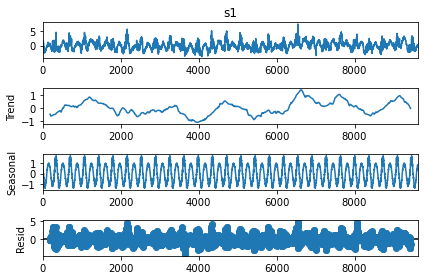

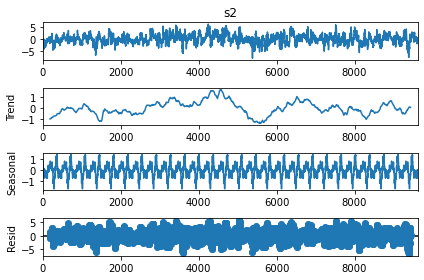

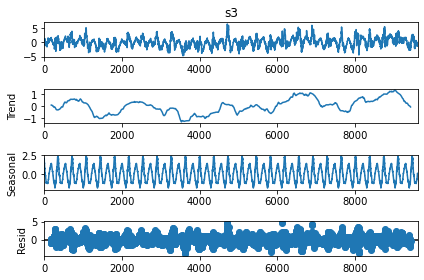

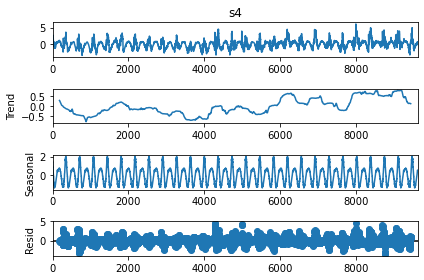

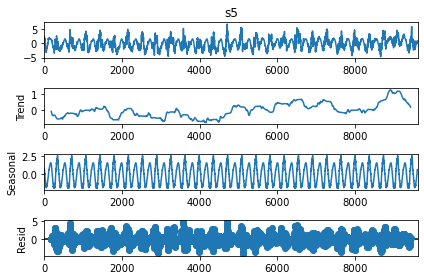

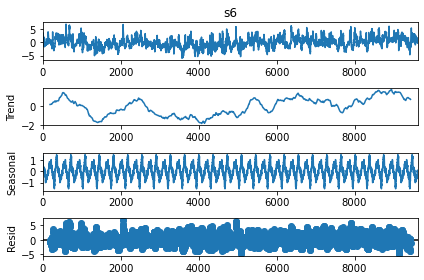

In [24]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]

li = {'s1': df['s1'], 's2': df['s2'], 's3': df['s3'], 's4': df['s4'], 's5': df['s5'], 's6': df['s6']}
for name, value in li.items():    
    tr = []
    result = seasonal_decompose(df[name], model='additive', period=365)
    #tr.append(result.trend)
    result.plot()
    pyplot.show()
    #print(tr)

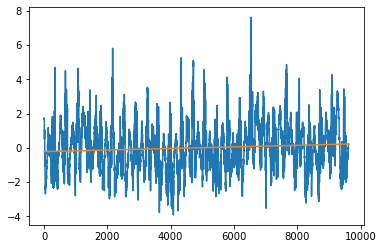

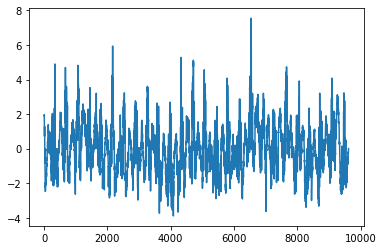

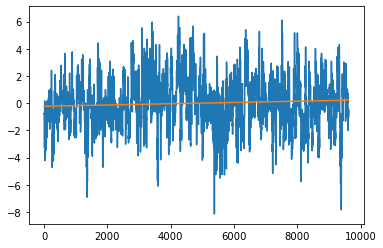

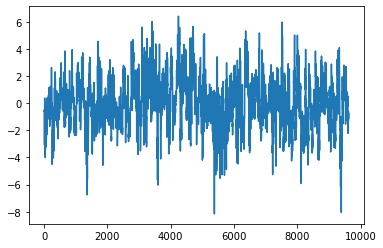

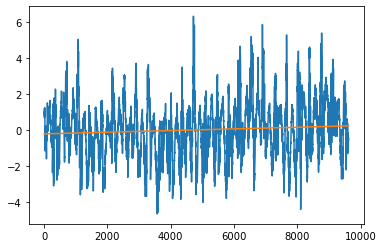

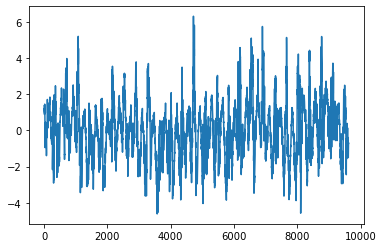

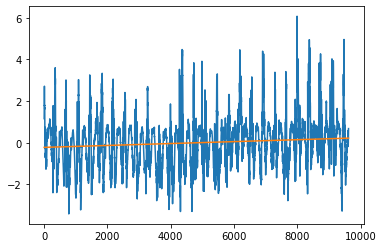

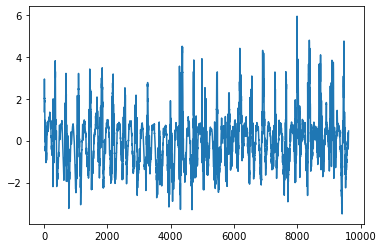

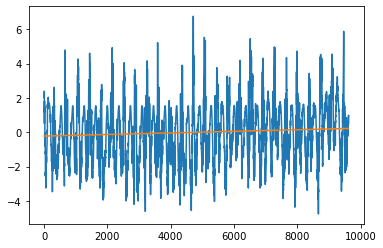

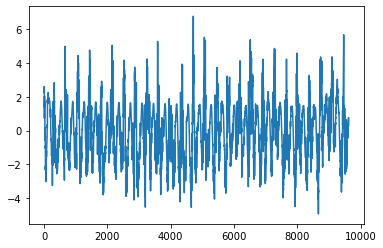

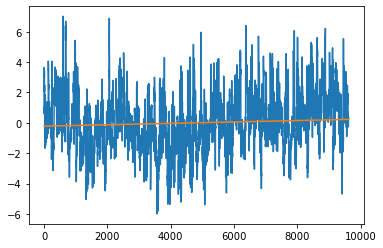

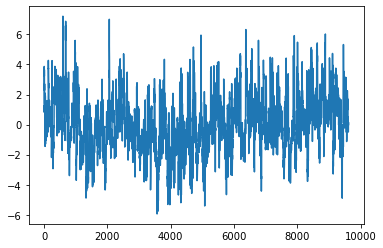

In [35]:
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

# fit linear model
for name, value in li.items():
    tr = pd.DataFrame()
    series = df[name]
    X = [i for i in range(0, len(series))]
    X = numpy.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    # calculate trend
    tr[name] = model.predict(X)
    # plot trend
    pyplot.plot(y)
    pyplot.plot(trend)
    pyplot.show()
    # detrend
    detrended = [y[i]-trend[i] for i in range(0, len(series))]
    # plot detrended
    pyplot.plot(detrended)
    pyplot.show()

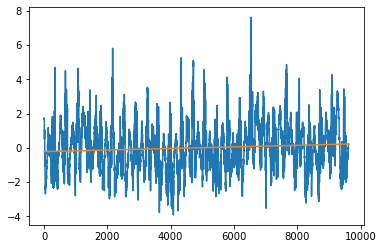

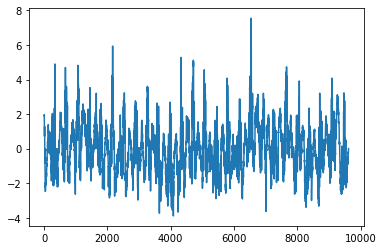

In [45]:
#for name, value in li.items():
tr = pd.DataFrame()
series = df['s4']
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
tr['s4'] = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

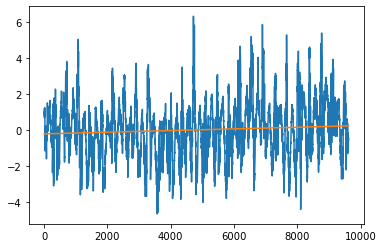

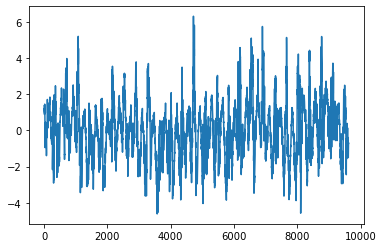

In [49]:
#for name, value in li.items():
#tr = pd.DataFrame()
series = df['s4']
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
tr['s4'] = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

In [51]:
tr = pd.DataFrame()
li = {'s1': df['s1'], 's2': df['s2'], 's3': df['s3'], 's4': df['s4'], 's5': df['s5'], 's6': df['s6']}
for name, value in li.items():
    
    series = df[name]
    X = [i for i in range(0, len(series))]
    X = numpy.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    # calculate trend
    tr[name] = model.predict(X)
    # detrend
    #detrended = [y[i]-trend[i] for i in range(0, len(series))] maybe Iàll use it, I don't know

In [54]:
tr.transpose().shape

(6, 9618)

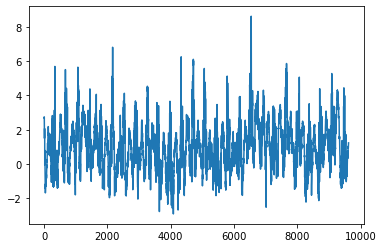

In [100]:
plt.plot(df['s1_const'])

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

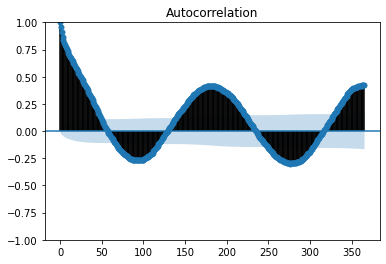

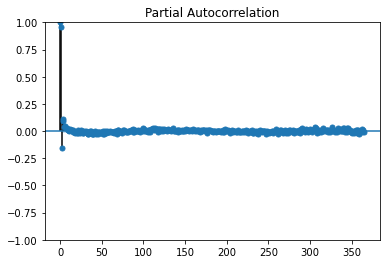

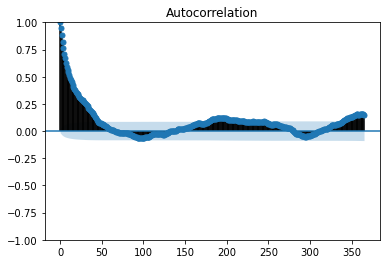

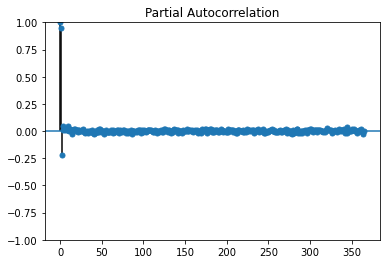

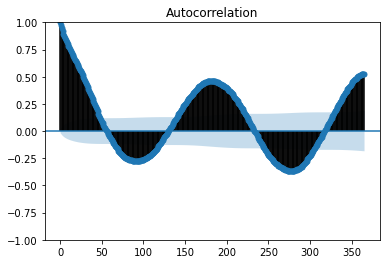

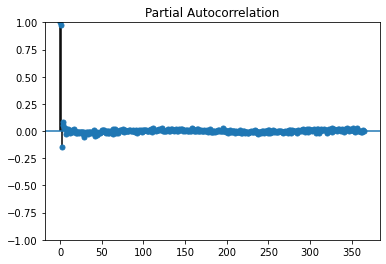

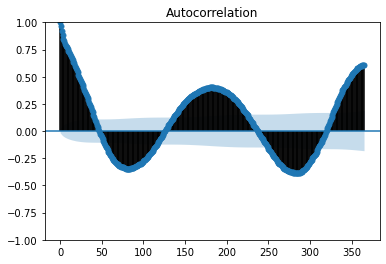

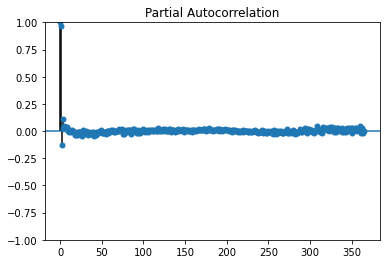

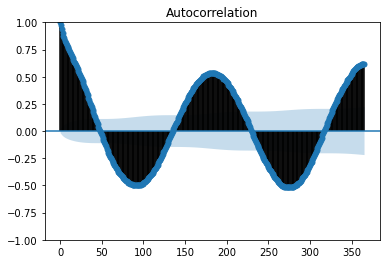

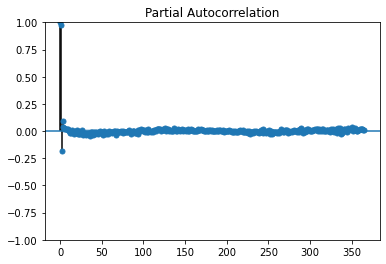

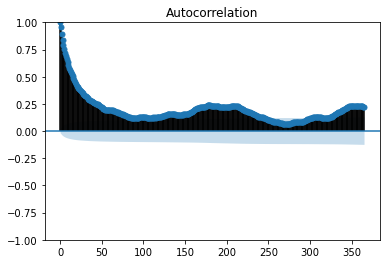

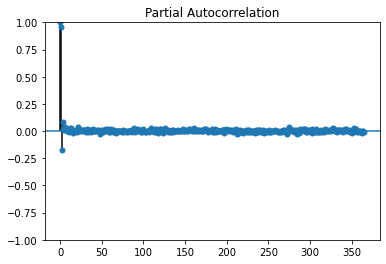

In [114]:
plot_acf(df['s1'], lags = 365)
plt.show()
plot_pacf(df['s1'], lags = 365)
plt.show()
plot_acf(df['s2'], lags = 365)
plt.show()
plot_pacf(df['s2'], lags = 365)
plt.show()
plot_acf(df['s3'], lags = 365)
plt.show()
plot_pacf(df['s3'], lags = 365)
plt.show()
plot_acf(df['s4'], lags = 365)
plt.show()
plot_pacf(df['s4'], lags = 365)
plt.show()
plot_acf(df['s5'], lags = 365)
plt.show()
plot_pacf(df['s5'], lags = 365)
plt.show()
plot_acf(df['s6'], lags = 365)
plt.show()
plot_pacf(df['s6'], lags = 365)
plt.show()


In [ ]:
df_small = df[0:100].copy()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
X = df['s5']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
train

# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

  2%|█▍                                                                            | 58/3271 [01:29<1:39:30,  1.86s/it]

In [32]:
def tr(df):
    X = df
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
     
    return train, test

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
X = df['s5']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
train

# this one works, so I should simply modify this one into a function
# walk-forward validation
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

  4%|██▉                                                                          | 123/3271 [13:30<6:10:30,  7.06s/it]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
def ARIMA(df, ar):
    X = df
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    train
    # walk-forward validation
    for ar_lag in range(ar):
        for t in tqdm(range(len(test))):
            model = ARIMA(history, order=(ar_lag,1,0))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test.iloc[t]
            history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#plt.plot(test)
#plt.plot(predictions, color='red')
#plt.show()

In [ ]:
#def ARIMA(df):
#    dict_autofit = {}
#    for ar_lag in range(2):
#        for ma_lag in range(3):  
#            X = df
#            size = int(len(X) * 0.66)
#            train, test = X[0:size], X[size:len(X)]
#            history = [x for x in train]
#            predictions = list()
#            for t in tqdm(range(len(test))):
#                model = ARIMA(history, order=(ar_lag,1,ma_lag))
#                model_fit = model.fit()
#                output = model_fit.forecast()
#                yhat = output[0]
#                predictions.append(yhat)
#                obs = test.iloc[t]
#                history.append(obs)
#            rmse = sqrt(mean_squared_error(test, predictions))
#            list_autofit = np.append([li,ar_lag, ma_lag, rmse])
#        dict_autofit[name] = pd.DataFrame(list_autofit, columns = ["li", "ar_lag", "ma_lag", "rmse"])
#    return rmse